In [123]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import csv
import random

# Study data files
Facebook_Ads = "Facebook_Ads_2.csv"
Social_Network_Ads="Social_Network_Ads(1).csv"

# Read the csv data and the study results
Facebook_Ads = pd.read_csv(Facebook_Ads)
Facebook_Ads.rename(columns={'Salary':'Estimated Salary'}, inplace=True)

Social_Network_Ads=pd.read_csv(Social_Network_Ads)

Facebook_Ads.columns=['Names','Time_Spent_on_Site', 'Estimated_Salary', 'Clicked']

Social_Network_Ads.columns=['User_ID','Gender', 'Age', 'Estimated_Salary', 'Purchased']

In [124]:
Facebook_Ads.head(10)

,Names,Time_Spent_on_Site,Estimated_Salary,Clicked
0,Martina Avila,25.649648,"$55,330.06",0
1,Harlan Barnes,32.456107,"$79,049.08",1
2,Naomi Rodriquez,20.945978,"$41,098.61",0
3,Jade Cunningham,54.039325,"$37,143.36",1
4,Cedric Leach,34.249729,"$37,355.11",0
5,Carla Hester,52.009946,"$80,642.65",1
6,Griffin Rivera,42.881370,"$61,908.40",1
7,Orli Casey,25.676920,"$29,851.41",0
8,Marny Obrien,40.698233,"$34,281.12",1
9,Rhonda Chavez,29.687362,"$41,098.88",0


In [125]:
Facebook_Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 499 entries, 0 to 498
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Names               499 non-null    object 
 1   Time_Spent_on_Site  499 non-null    float64
 2   Estimated_Salary    499 non-null    object 
 3   Clicked             499 non-null    int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 15.7+ KB


In [126]:
#count to confirm above
Facebook_Ads.count()

Names                 499
Time_Spent_on_Site    499
Estimated_Salary      499
Clicked               499
dtype: int64

In [127]:
##No missing/null values to drop

In [128]:
#total clicks 
clicks=Facebook_Ads['Clicked'].count()
clicks

499

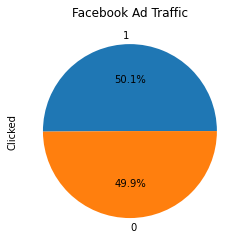

Per each visit to Facebook, 50.1% visitors clicked on an ad while 49.9% did not click on an ad.


In [129]:
clicks = Facebook_Ads.Clicked.value_counts()
clicks.plot(kind="pie",autopct='%1.1f%%')
plt.title("Facebook Ad Traffic")
plt.savefig("FB_Ad_Traffic_PIE")
plt.show()
print("Per each visit to Facebook, 50.1% visitors clicked on an ad while 49.9% did not click on an ad.")

In [130]:
# Average amount of time spent on site
average_time_spent=(Facebook_Ads["Time_Spent_on_Site"].mean())

average_time_spent

32.92017833020841

In [151]:
#chart time spent on site by participant in data file
line_chart = Facebook_Ads.groupby('Time_Spent_on_Site')['Names']
time_spent= pd.DataFrame(line_chart)
time_spent.head(20)

,0,1
0,5.000000,"492 Nolan Name: Names, dtype: object"
1,7.521480,"328 Sexton, Shaeleigh H. Name: Names, dtype..."
2,7.764373,"443 Aristotle Name: Names, dtype: object"
3,10.508806,"146 Allen Burke Name: Names, dtype: object"
4,10.864857,"191 Gannon Marquez Name: Names, dtype: object"
5,11.451366,"361 Beach, Victor S. Name: Names, dtype: ob..."
6,11.863239,"93 Yen Santana Name: Names, dtype: object"
7,11.931267,"298 Jelani A. Wall Name: Names, dtype: object"
8,12.866031,"98 Emerald Hamilton Name: Names, dtype: object"
9,13.194055,"435 Brady Name: Names, dtype: object"


The average amount of time spent on the site was 32.92 minutes.


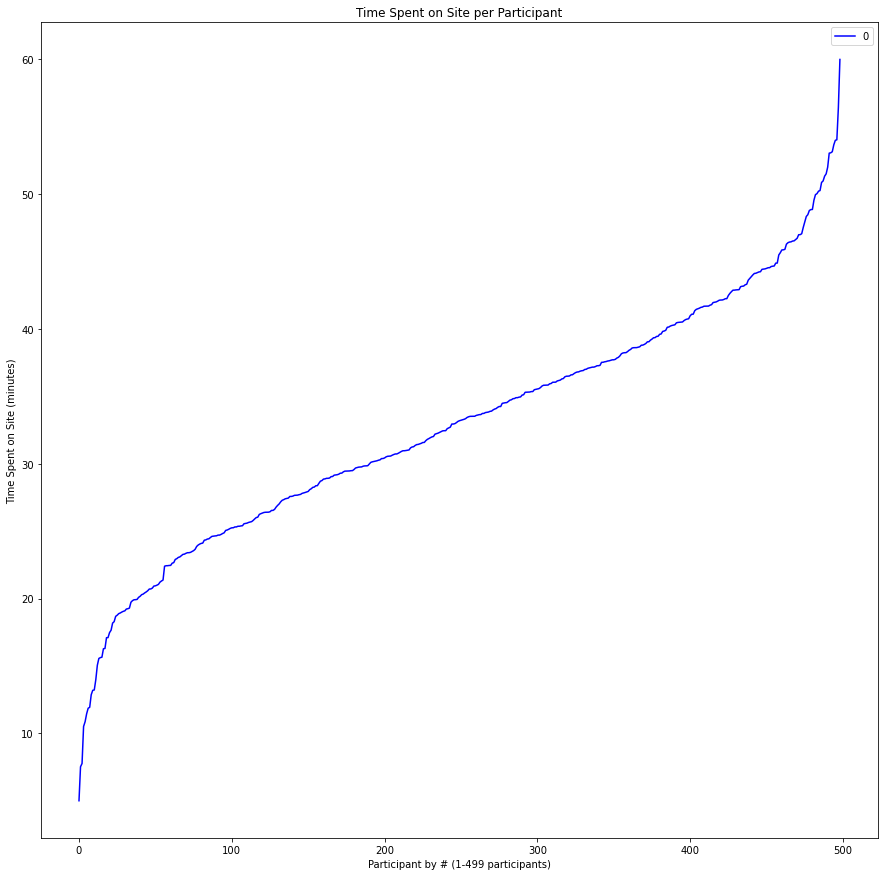

In [153]:
#set-up line chart to show length of time each participant in data group spent on site
time_spent.plot(kind="line", figsize=(15,15), color = "b", legend=True)
plt.ylabel("Time Spent on Site (minutes)")
plt.xlabel("Participant by # (1-499 participants)")
plt.title("Time Spent on Site per Participant")
plt.savefig("Time Spent on Site per Participant- Line graph")

print("The average amount of time spent on the site was 32.92 minutes.")

In [154]:
Social_Network_Ads.head(10)

,User_ID,Gender,Age,Estimated_Salary,Purchased
0,15624510,Male,19,"$19,000.00",0
1,15810944,Male,35,"$20,000.00",0
2,15668575,Female,26,"$43,000.00",0
3,15603246,Female,27,"$57,000.00",0
4,15804002,Male,19,"$76,000.00",0
5,15728773,Male,27,"$58,000.00",0
6,15598044,Female,27,"$84,000.00",0
7,15694829,Female,32,"$150,000.00",1
8,15600575,Male,25,"$33,000.00",0
9,15727311,Female,35,"$65,000.00",0


In [155]:
#check for irregularites/null 

Social_Network_Ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           400 non-null    int64 
 1   Gender            400 non-null    object
 2   Age               400 non-null    int64 
 3   Estimated_Salary  400 non-null    object
 4   Purchased         400 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 15.8+ KB


In [156]:
#count to confirm above
Social_Network_Ads.count()

User_ID             400
Gender              400
Age                 400
Estimated_Salary    400
Purchased           400
dtype: int64

In [157]:
##No missing/null values to drop

In [158]:
#how many purcahses total? 

purchases=Social_Network_Ads['Purchased'].sum()
purchases

143

In [159]:
age_counts = Social_Network_Ads["Age"].value_counts()
age_counts

35    32
37    20
26    16
42    16
41    16
39    15
40    15
47    14
48    14
27    13
38    13
46    12
28    12
36    12
30    11
31    11
49    10
29    10
24     9
32     9
33     9
45     7
59     7
60     7
19     7
20     7
52     6
34     6
25     6
23     6
58     6
57     5
53     5
18     5
22     5
50     4
54     4
21     4
43     3
55     3
56     3
51     3
44     2
Name: Age, dtype: int64

In [160]:
# Convert the age_counts Series into a DataFrame
age_counts_df = pd.DataFrame(age_counts)
age_counts_df.head()

,Age
35,32
37,20
26,16
42,16
41,16


In [161]:
# Convert the column name into "Sum of ages"
age_counts_df = age_counts_df.rename(
    columns={"Age": "Sum of Ages"})
age_counts_df

,Sum of Ages
35,32
37,20
26,16
42,16
41,16
39,15
40,15
47,14
48,14
27,13


The most frequent age per participant is 35 years old.


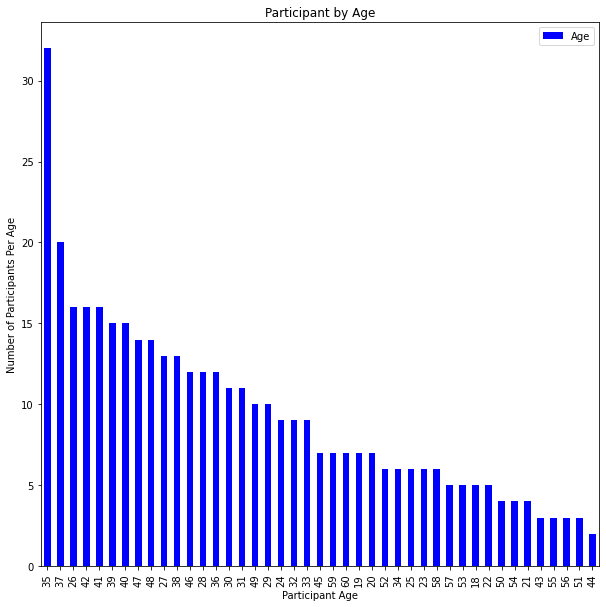

In [162]:
age_counts.plot(kind="bar", figsize=(10,10), color = "b",legend=True)
plt.ylabel("Number of Participants Per Age")
plt.xlabel("Participant Age")
plt.title("Participant by Age")
plt.savefig('Participents by age')

print("The most frequent age per participant is 35 years old.")


In [181]:
salary_counts = Social_Network_Ads["Estimated_Salary"].value_counts()
salary_counts

 $72,000.00      12
 $80,000.00      11
 $79,000.00      10
 $75,000.00       9
 $71,000.00       9
                 ..
 $99,000.00       1
 $105,000.00      1
 $95,000.00       1
 $142,000.00      1
 $46,000.00       1
Name: Estimated_Salary, Length: 117, dtype: int64

In [164]:
# Convert the salary_counts Series into a DataFrame
salary_counts_df = pd.DataFrame(salary_counts)
salary_counts_df.head()

,Estimated Salary
"$72,000.00",12
"$80,000.00",11
"$79,000.00",10
"$75,000.00",9
"$71,000.00",9


In [165]:
# Convert the column name into "Sum of ages"
salary_counts_df = salary_counts_df.rename(
    columns={"Estimated Salary": "Sum of Estimated Salary"})
salary_counts_df

,Sum of Estimated Salary
"$72,000.00",12
"$80,000.00",11
"$79,000.00",10
"$75,000.00",9
"$71,000.00",9
...,...
"$99,000.00",1
"$105,000.00",1
"$95,000.00",1
"$142,000.00",1


In [166]:
#Determine average (mean) salary and groupby mean
average_salary= Social_Network_Ads.groupby(['Estimated_Salary']).mean()
average_salary

,User_ID,Age,Purchased
Estimated_Salary,,,
"$100,000.00",15744279.00,32.00,1.00
"$101,000.00",15660866.00,58.00,1.00
"$102,000.00",15593715.00,60.00,1.00
"$104,000.00",15669887.25,51.25,1.00
"$105,000.00",15729908.00,47.00,1.00
...,...,...,...
"$93,000.00",15734161.00,37.00,1.00
"$95,000.00",15569641.00,58.00,1.00
"$96,000.00",15691158.75,40.00,0.75


In [167]:
#create table with count of purchases per age
line_chart = Social_Network_Ads.groupby('Age').count()['Purchased']
age_purchase= pd.DataFrame(line_chart)
age_purchase.head(20)

,Purchased
Age,
18,5
19,7
20,7
21,4
22,5
23,6
24,9
25,6
26,16


The rate of purcahses peak between ages 30-40.


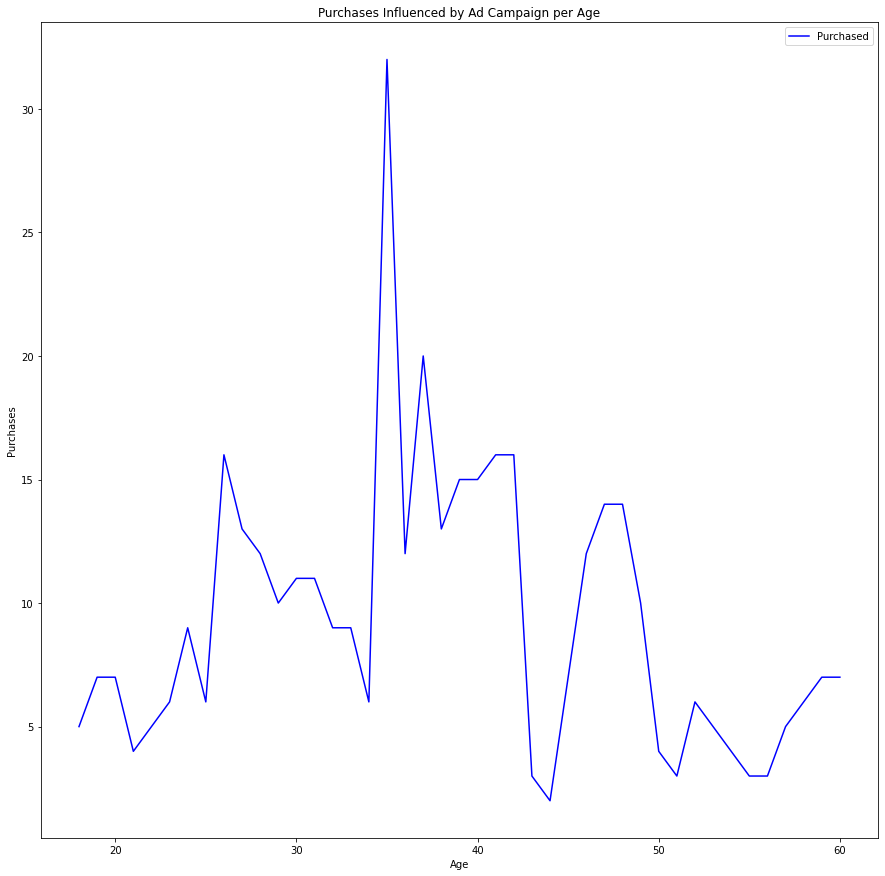

In [168]:
#set-up line chart to show how many instances purchases were made participant per age

age_purchase.plot(kind="line", figsize=(15,15), color = "b", legend=True)
plt.ylabel("Purchases")
plt.xlabel("Age")
plt.title("Purchases Influenced by Ad Campaign per Age")
plt.savefig("Purchases Influenced by Ad Campaign per Age - Line graph")

print("The rate of purcahses peak between ages 30-40.")

In [169]:
#create table with count of purchases per gender
bar_chart = Social_Network_Ads.groupby('Gender').count()['Purchased']
gender_purchase= pd.DataFrame(bar_chart)
gender_purchase.head(20)

,Purchased
Gender,
Female,204
Male,196


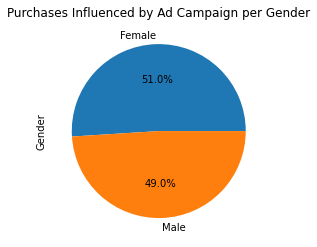

Slightly more purchases were made by Females than males; 2% to be exact.


In [170]:
# Generate a pie plot showing the distribution of male/female purchases
counts = Social_Network_Ads.Gender.value_counts()
counts.plot(kind="pie",autopct='%1.1f%%')
plt.title("Purchases Influenced by Ad Campaign per Gender")
plt.savefig("Purchases Influenced by Ad Campaign per Gender_PIE")
plt.show()
print("Slightly more purchases were made by Females than males; 2% to be exact.")